<a href="https://colab.research.google.com/github/VinayakG2002/README.md/blob/main/FFNN_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
import nltk
import random

In [2]:
url='https://raw.githubusercontent.com/VinayakG2002/NLPlay-with-Transformers/main/IMDB%20Dataset.csv?token=ATKA2LIXPHWLGQT64HBC2KLA6XEPW'
df = pd.read_csv(url)

In [3]:
print(df.columns)
df.describe()

Index(['review', 'sentiment'], dtype='object')


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [6]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['without stopwords']=df['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))


In [7]:
df['without stopwords'][0]

"One reviewers mentioned watching 1 Oz episode hooked. They right, exactly happened me.<br /><br />The first thing struck Oz brutality unflinching scenes violence, set right word GO. Trust me, show faint hearted timid. This show pulls punches regards drugs, sex violence. Its hardcore, classic use word.<br /><br />It called OZ nickname given Oswald Maximum Security State Penitentary. It focuses mainly Emerald City, experimental section prison cells glass fronts face inwards, privacy high agenda. Em City home many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish more....so scuffles, death stares, dodgy dealings shady agreements never far away.<br /><br />I would say main appeal show due fact goes shows dare. Forget pretty pictures painted mainstream audiences, forget charm, forget romance...OZ mess around. The first episode I ever saw struck nasty surreal, I say I ready it, I watched more, I developed taste Oz, got accustomed high levels graphic violence. Not violence, in

In [8]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', ','))
    return final

df['without stopwords'] = df['without stopwords'].apply(remove_punctuation)

In [9]:
def remove_tag(text):
  final=""
  x=True
  for letter in text:
    if letter=='<':
      x=False
    if x==True:
      final=final + letter
    if letter=='>':
      x=True
      final= final+ " "
  return final
df['without stopwords'] = df['without stopwords'].apply(remove_tag)

In [10]:
df['without stopwords'][0]

"One reviewers mentioned watching 1 Oz episode hooked They right exactly happened me  The first thing struck Oz brutality unflinching scenes violence set right word GO Trust me show faint hearted timid This show pulls punches regards drugs sex violence Its hardcore classic use word  It called OZ nickname given Oswald Maximum Security State Penitentary It focuses mainly Emerald City experimental section prison cells glass fronts face inwards privacy high agenda Em City home manyAryans Muslims gangstas Latinos Christians Italians Irish moreso scuffles death stares dodgy dealings shady agreements never far away  I would say main appeal show due fact goes shows dare Forget pretty pictures painted mainstream audiences forget charm forget romanceOZ mess around The first episode I ever saw struck nasty surreal I say I ready it I watched more I developed taste Oz got accustomed high levels graphic violence Not violence injustice (crooked guards who'll sold nickel inmates who'll kill order get 

In [11]:
nltk.download('punkt')
df['tokenized']=df['without stopwords'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
def stemmer(input):
  output= [nltk.stem.PorterStemmer().stem(word) for word in input]
  return output
df['stemmed tokens']=df['tokenized'].apply(stemmer)

In [13]:
df['label']=[2*(sentiment=='positive')-1 for sentiment in df['sentiment']]

In [14]:
df.head(10)

,review,sentiment,without stopwords,tokenized,stemmed tokens,label
0,One of the other reviewers has mentioned that ...,positive,One reviewers mentioned watching 1 Oz episode ...,"[One, reviewers, mentioned, watching, 1, Oz, e...","[one, review, mention, watch, 1, Oz, episod, h...",1
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming te...,"[A, wonderful, little, production, The, filmin...","[A, wonder, littl, product, the, film, techniq...",1
2,I thought this was a wonderful way to spend ti...,positive,I thought wonderful way spend time hot summer ...,"[I, thought, wonderful, way, spend, time, hot,...","[I, thought, wonder, way, spend, time, hot, su...",1
3,Basically there's a family where a little boy ...,negative,Basically there's family little boy (Jake) thi...,"[Basically, there, 's, family, little, boy, (,...","[basic, there, 's, famili, littl, boy, (, jake...",-1
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei's Love Time Money visually stunn...,"[Petter, Mattei, 's, Love, Time, Money, visual...","[petter, mattei, 's, love, time, money, visual...",1
5,"Probably my all-time favorite movie, a story o...",positive,Probably all-time favorite movie story selfles...,"[Probably, all-time, favorite, movie, story, s...","[probabl, all-tim, favorit, movi, stori, selfl...",1
6,I sure would like to see a resurrection of a u...,positive,I sure would like see resurrection dated Seahu...,"[I, sure, would, like, see, resurrection, date...","[I, sure, would, like, see, resurrect, date, s...",1
7,"This show was an amazing, fresh & innovative i...",negative,This show amazing fresh & innovative idea 70's...,"[This, show, amazing, fresh, &, innovative, id...","[thi, show, amaz, fresh, &, innov, idea, 70, '...",-1
8,Encouraged by the positive comments about this...,negative,Encouraged positive comments film I looking fo...,"[Encouraged, positive, comments, film, I, look...","[encourag, posit, comment, film, I, look, forw...",-1
9,If you like original gut wrenching laughter yo...,positive,If like original gut wrenching laughter like m...,"[If, like, original, gut, wrenching, laughter,...","[If, like, origin, gut, wrench, laughter, like...",1


In [15]:

from gensim import corpora

review_dict = corpora.Dictionary(df['stemmed tokens'])

In [16]:
print(review_dict)

Dictionary(133824 unique tokens: ["'ll", '(', ')', '1', 'Em']...)


In [17]:
from sklearn.model_selection import train_test_split
# Train Test Split Function

def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['review','sentiment','without stopwords','tokenized','stemmed tokens','label']], 
                                                        top_data_df_small['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
-1    17512
 1    17488
Name: label, dtype: int64
Value counts for Test sentiments
 1    7512
-1    7488
Name: label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  ... label
0  36322  ...     1
1   4638  ...     1
2  46808  ...    -1
3  38099  ...    -1
4  31461  ...     1

[5 rows x 7 columns]


In [18]:
X_train


,index,review,sentiment,without stopwords,tokenized,stemmed tokens,label
0,36322,The sequel is exactly what you will expect it ...,positive,The sequel exactly expect be And good enough e...,"[The, sequel, exactly, expect, be, And, good, ...","[the, sequel, exactli, expect, be, and, good, ...",1
1,4638,This is a pretty well known one so i won't get...,positive,This pretty well known one get deep it The bas...,"[This, pretty, well, known, one, get, deep, it...","[thi, pretti, well, known, one, get, deep, it,...",1
2,46808,I made the mistake of buying this since I coll...,negative,I made mistake buying since I collect comic bo...,"[I, made, mistake, buying, since, I, collect, ...","[I, made, mistak, buy, sinc, I, collect, comic...",-1
3,38099,This movie is the proverbial 80s flick that sh...,negative,This movie proverbial 80s flick shows viewer l...,"[This, movie, proverbial, 80s, flick, shows, v...","[thi, movi, proverbi, 80, flick, show, viewer,...",-1
4,31461,I absolutely LOVED this movie as a child. I ca...,positive,I absolutely LOVED movie child I can't seem fi...,"[I, absolutely, LOVED, movie, child, I, ca, n'...","[I, absolut, love, movi, child, I, ca, n't, se...",1
...,...,...,...,...,...,...,...
34995,39296,"When i started watching ""Surface""for the first...",positive,When started watching Surfacefor first time ho...,"[When, started, watching, Surfacefor, first, t...","[when, start, watch, surfacefor, first, time, ...",1
34996,49015,Are you kidding me? This is quite possibly the...,negative,Are kidding me This quite possibly worst amate...,"[Are, kidding, me, This, quite, possibly, wors...","[are, kid, me, thi, quit, possibl, worst, amat...",-1
34997,2693,One would make you believe that this game is a...,negative,One would make believe game man obsessed numbe...,"[One, would, make, believe, game, man, obsesse...","[one, would, make, believ, game, man, obsess, ...",-1
34998,8076,I'D BUY THAT FOR A DOLLAR!!!<br /><br />I did ...,positive,I'D BUY THAT FOR A DOLLAR I buy film dollar I...,"[I, 'D, BUY, THAT, FOR, A, DOLLAR, I, buy, fil...","[I, 'D, buy, that, for, A, dollar, I, buy, fil...",1


In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [20]:
# define FeedforwardNeuralNetwork
class FeedForwardNN(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(FeedForwardNN,self).__init__()
        
        # Linear fnction 1
        self.LF1 = nn.Linear(input_size,hidden_size)
        # Nonlinear fnction 1
        self.NLF1 = nn.ReLU()
        
        # Linear function 2
        self.LF2 = nn.Linear(hidden_size,hidden_size)
        # Nonlinear fnction 2
        self.NLF2 = nn.ReLU()
        
        #Linear function 2
        self.LF3 = nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        # Layer 1
        out = self.LF1(x)
        out = self.NLF1(out)
        
        #Layer 2 
        out = self.LF2(out)
        out = self.NLF2(out)
        
        #Layer 3
        out = self.LF3(out)
        
        return F.softmax(out,dim=1)

In [21]:

VOCAB_SIZE = len(review_dict)
NUM_LABELS = 2

def make_bow_vector(review_dict, sentence):
    vec = torch.zeros(VOCAB_SIZE, dtype=torch.float64, device=device)
    for word in sentence:
        vec[review_dict.token2id[word]] += 1
    return vec.view(1, -1).float()

In [22]:

def make_pred(label):
    if label == -1:
        return torch.tensor([0], dtype = torch.long, device = device)
    elif label == 1:
        return torch.tensor([1], dtype = torch.long, device = device)

In [23]:
def train(num_epochs,batch_size,optimizer,loss_function = nn.CrossEntropyLoss()):
  losses = []
  task_len = num_epochs *len(X_train)
  ittr = 0
  for epoch in range(num_epochs):
      train_loss = torch.tensor([0.],device = device)
      for index,row in X_train.iterrows():
          ittr+=1
          if ittr%(task_len//100) == 0:
            print(ittr*100//(task_len),'% complemeted')
          # make bag of word vector 
          bow_vec = make_bow_vector(review_dict,row['stemmed tokens'])
        
          # Forward pass
          preds = FFNN(bow_vec)
        
          # get target label
          target = make_pred(Y_train['label'][index])

          loss = loss_function(preds, target)
  
          train_loss +=loss
        
          if ittr%batch_size ==0:
            # clear gradients
            optimizer.zero_grad()

            # compute gradientts
            train_loss.backward()

            # update parameters
            optimizer.step()
            
            losses.append(train_loss.item())
            train_loss = 0.
  return losses

In [24]:
def accuracy():
  correct_preds = 0
  for index,row in X_test.iterrows():
    bow_vec = make_bow_vector(review_dict,row['stemmed tokens'])
    # Forward pass
    preds = list(FFNN(bow_vec)[0])
    if preds[0]>preds[1]:
      out = -1
    else :
      out = +1
    if out == row['label']:
      correct_preds+=1
  
  return correct_preds*100/len(X_test)

def plot_loss(losses):
  x = [i for i in range(0,len(losses))]
  plt.plot(x,losses)
  plt.title('Loss fnction')
  plt.ylabel('Loss')
  plt.xlabel('batch index')

In [25]:
VOCAB_SIZE = len(review_dict)

input_size = VOCAB_SIZE
hidden_dim = 500
output_size = 2
num_epochs = 2
batch_size = 200

FFNN = FeedForwardNN(input_size,hidden_dim,output_size)
FFNN.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(FFNN.parameters(), lr = 0.005)


In [26]:
losses = train(num_epochs,200,optimizer)

1 % complemeted
2 % complemeted
3 % complemeted
4 % complemeted
5 % complemeted
6 % complemeted
7 % complemeted
8 % complemeted
9 % complemeted
10 % complemeted
11 % complemeted
12 % complemeted
13 % complemeted
14 % complemeted
15 % complemeted
16 % complemeted
17 % complemeted
18 % complemeted
19 % complemeted
20 % complemeted
21 % complemeted
22 % complemeted
23 % complemeted
24 % complemeted
25 % complemeted
26 % complemeted
27 % complemeted
28 % complemeted
29 % complemeted
30 % complemeted
31 % complemeted
32 % complemeted
33 % complemeted
34 % complemeted
35 % complemeted
36 % complemeted
37 % complemeted
38 % complemeted
39 % complemeted
40 % complemeted
41 % complemeted
42 % complemeted
43 % complemeted
44 % complemeted
45 % complemeted
46 % complemeted
47 % complemeted
48 % complemeted
49 % complemeted
50 % complemeted
51 % complemeted
52 % complemeted
53 % complemeted
54 % complemeted
55 % complemeted
56 % complemeted
57 % complemeted
58 % complemeted
59 % complemeted
60 % c

In [27]:
accuracy()


86.64

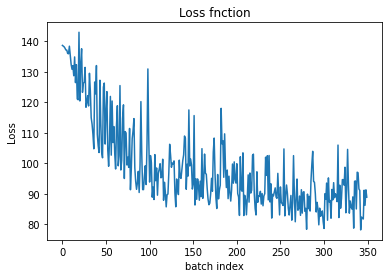

In [28]:
plot_loss(losses)

In [29]:
optimizer = optim.SGD(FFNN.parameters(), lr = 0.001)
num_epochs = 2
batch_size = 100
losses = train(num_epochs,batch_size,optimizer)

1 % complemeted
2 % complemeted
3 % complemeted
4 % complemeted
5 % complemeted
6 % complemeted
7 % complemeted
8 % complemeted
9 % complemeted
10 % complemeted
11 % complemeted
12 % complemeted
13 % complemeted
14 % complemeted
15 % complemeted
16 % complemeted
17 % complemeted
18 % complemeted
19 % complemeted
20 % complemeted
21 % complemeted
22 % complemeted
23 % complemeted
24 % complemeted
25 % complemeted
26 % complemeted
27 % complemeted
28 % complemeted
29 % complemeted
30 % complemeted
31 % complemeted
32 % complemeted
33 % complemeted
34 % complemeted
35 % complemeted
36 % complemeted
37 % complemeted
38 % complemeted
39 % complemeted
40 % complemeted
41 % complemeted
42 % complemeted
43 % complemeted
44 % complemeted
45 % complemeted
46 % complemeted
47 % complemeted
48 % complemeted
49 % complemeted
50 % complemeted
51 % complemeted
52 % complemeted
53 % complemeted
54 % complemeted
55 % complemeted
56 % complemeted
57 % complemeted
58 % complemeted
59 % complemeted
60 % c

87.42666666666666


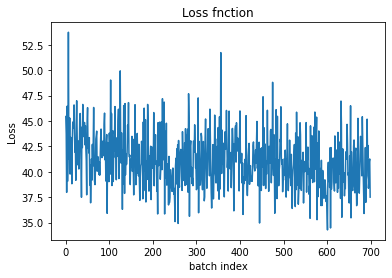

In [30]:

print(accuracy())

plot_loss(losses)

In [31]:

optimizer = optim.SGD(FFNN.parameters(), lr = 0.0001)
num_epochs = 3
batch_size = 1000
losses = train(num_epochs,batch_size,optimizer)

1 % complemeted
2 % complemeted
3 % complemeted
4 % complemeted
5 % complemeted
6 % complemeted
7 % complemeted
8 % complemeted
9 % complemeted
10 % complemeted
11 % complemeted
12 % complemeted
13 % complemeted
14 % complemeted
15 % complemeted
16 % complemeted
17 % complemeted
18 % complemeted
19 % complemeted
20 % complemeted
21 % complemeted
22 % complemeted
23 % complemeted
24 % complemeted
25 % complemeted
26 % complemeted
27 % complemeted
28 % complemeted
29 % complemeted
30 % complemeted
31 % complemeted
32 % complemeted
33 % complemeted
34 % complemeted
35 % complemeted
36 % complemeted
37 % complemeted
38 % complemeted
39 % complemeted
40 % complemeted
41 % complemeted
42 % complemeted
43 % complemeted
44 % complemeted
45 % complemeted
46 % complemeted
47 % complemeted
48 % complemeted
49 % complemeted
50 % complemeted
51 % complemeted
52 % complemeted
53 % complemeted
54 % complemeted
55 % complemeted
56 % complemeted
57 % complemeted
58 % complemeted
59 % complemeted
60 % c

87.83333333333333


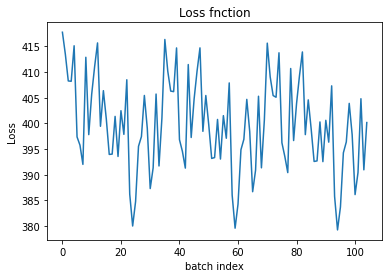

In [32]:
print(accuracy())

plot_loss(losses)

In [33]:
optimizer = optim.SGD(FFNN.parameters(), lr = 1e-6)
num_epochs = 5
batch_size = 5000
losses = train(num_epochs,batch_size,optimizer)

1 % complemeted
2 % complemeted
3 % complemeted
4 % complemeted
5 % complemeted
6 % complemeted
7 % complemeted
8 % complemeted
9 % complemeted
10 % complemeted
11 % complemeted
12 % complemeted
13 % complemeted
14 % complemeted
15 % complemeted
16 % complemeted
17 % complemeted
18 % complemeted
19 % complemeted
20 % complemeted
21 % complemeted
22 % complemeted
23 % complemeted
24 % complemeted
25 % complemeted
26 % complemeted
27 % complemeted
28 % complemeted
29 % complemeted
30 % complemeted
31 % complemeted
32 % complemeted
33 % complemeted
34 % complemeted
35 % complemeted
36 % complemeted
37 % complemeted
38 % complemeted
39 % complemeted
40 % complemeted
41 % complemeted
42 % complemeted
43 % complemeted
44 % complemeted
45 % complemeted
46 % complemeted
47 % complemeted
48 % complemeted
49 % complemeted
50 % complemeted
51 % complemeted
52 % complemeted
53 % complemeted
54 % complemeted
55 % complemeted
56 % complemeted
57 % complemeted
58 % complemeted
59 % complemeted
60 % c

87.84666666666666


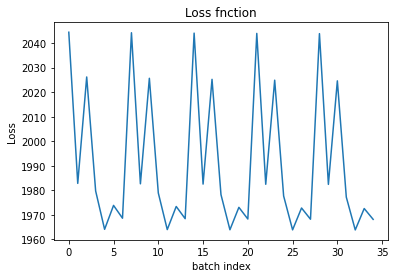

In [34]:
print(accuracy())

plot_loss(losses)

In [35]:
optimizer = optim.SGD(FFNN.parameters(), lr = 1e-4)
num_epochs = 3
batch_size = 10
losses = train(num_epochs,batch_size,optimizer)

1 % complemeted
2 % complemeted
3 % complemeted
4 % complemeted
5 % complemeted
6 % complemeted
7 % complemeted
8 % complemeted
9 % complemeted
10 % complemeted
11 % complemeted
12 % complemeted
13 % complemeted
14 % complemeted
15 % complemeted
16 % complemeted
17 % complemeted
18 % complemeted
19 % complemeted
20 % complemeted
21 % complemeted
22 % complemeted
23 % complemeted
24 % complemeted
25 % complemeted
26 % complemeted
27 % complemeted
28 % complemeted
29 % complemeted
30 % complemeted
31 % complemeted
32 % complemeted
33 % complemeted
34 % complemeted
35 % complemeted
36 % complemeted
37 % complemeted
38 % complemeted
39 % complemeted
40 % complemeted
41 % complemeted
42 % complemeted
43 % complemeted
44 % complemeted
45 % complemeted
46 % complemeted
47 % complemeted
48 % complemeted
49 % complemeted
50 % complemeted
51 % complemeted
52 % complemeted
53 % complemeted
54 % complemeted
55 % complemeted
56 % complemeted
57 % complemeted
58 % complemeted
59 % complemeted
60 % c

87.87333333333333


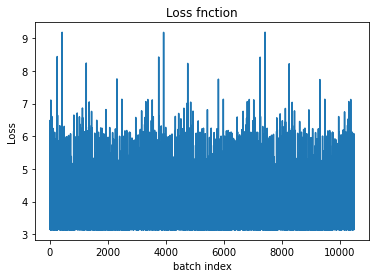

In [36]:
print(accuracy())

plot_loss(losses)